### Select the Right Threshold values using ROC Curve

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification




In [3]:
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=2000, n_classes=2, weights=[1,1], random_state=1)

In [4]:
X.shape

(2000, 20)

In [5]:
y

array([0, 0, 0, ..., 1, 1, 0])

In [6]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [7]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#### Random Forests

In [8]:
## Apply RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 1.0
RF test roc-auc: 0.979061111111111


In [9]:
ytrain_pred

array([[0.99, 0.01],
       [0.99, 0.01],
       [0.01, 0.99],
       ...,
       [0.96, 0.04],
       [0.99, 0.01],
       [0.33, 0.67]])

#### Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.9863568922694498
Logistic test roc-auc: 0.9885777777777777


#### Adaboost Classifier

In [11]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.9975081174960356
Adaboost test roc-auc: 0.9826111111111111


#### KNNClassifier

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.981670071491109
Adaboost test roc-auc: 0.9426111111111111


#### No we will focus on selecting the best threshold for maximum accuracy

In [27]:
a=log_classifier.predict_proba(X_test)[:,1]

In [28]:
b=pd.Series(a)

In [29]:
b

0      0.991861
1      0.000008
2      0.966929
3      0.761539
4      0.779443
         ...   
595    0.024239
596    0.000003
597    0.984385
598    0.001147
599    0.989540
Length: 600, dtype: float64

In [57]:
len(y_test)

600

In [30]:
pred=[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9846666666666667


In [55]:
final_prediction

0      0.885262
1      0.118323
2      0.816283
3      0.762853
4      0.552447
         ...   
595    0.123840
596    0.117845
597    0.879197
598    0.160717
599    0.834857
Length: 600, dtype: float64

In [47]:
=[1,2,3,4]
l2=[5,6,7,8]

In [44]:
a

[1, 2, 3, 4]

In [ ]:
pd.concat(a)

In [54]:
pd.concat(pred,axis=1).mean(axis=1)

0      0.885262
1      0.118323
2      0.816283
3      0.762853
4      0.552447
         ...   
595    0.123840
596    0.117845
597    0.879197
598    0.160717
599    0.834857
Length: 600, dtype: float64

In [15]:
final_prediction

0      0.885262
1      0.118323
2      0.816283
3      0.762853
4      0.552447
         ...   
595    0.123840
596    0.117845
597    0.879197
598    0.160717
599    0.834857
Length: 600, dtype: float64

In [61]:
#### Calculate the ROc Curve


fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.9134413 , 0.9134413 , 0.90656694, 0.90577475, 0.81628281,
       0.8155558 , 0.80949934, 0.80912833, 0.78390513, 0.78037124,
       0.73321832, 0.73137362, 0.71499037, 0.71143711, 0.68397732,
       0.67243537, 0.60957293, 0.60425354, 0.60212652, 0.59864346,
       0.58327749, 0.58236186, 0.58146627, 0.58050386, 0.56542732,
       0.55469563, 0.53105932, 0.47866892, 0.46240225, 0.43794916,
       0.4296034 , 0.39068654, 0.38379719, 0.34386723, 0.34086612,
       0.23119003, 0.22896893, 0.2244954 , 0.22390421, 0.19741423,
       0.19598417, 0.126067  , 0.1253351 , 0.10548439])

In [63]:
len(fpr)

44

In [17]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
29,0.437949,0.961667
30,0.429603,0.960000
28,0.462402,0.960000
27,0.478669,0.958333
26,0.531059,0.958333


In [18]:
accuracy_ls

,thresholds,accuracy
29,0.437949,0.961667
30,0.429603,0.960000
28,0.462402,0.960000
27,0.478669,0.958333
26,0.531059,0.958333
25,0.554696,0.953333
24,0.565427,0.953333
21,0.582362,0.950000
31,0.390687,0.950000
23,0.580504,0.950000


In [19]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

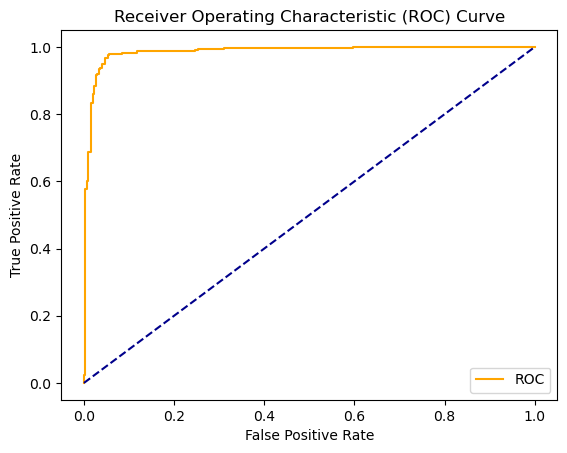

In [20]:
plot_roc_curve(fpr,tpr)